# Neural Network from Scratch in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.8.0


In [2]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.zeros(shape=(self.layers[i], 1)))    

    def forward_pass(self, X):
        A = tf.convert_to_tensor(X, dtype=tf.float32)
        for i in range(1, self.L):
            z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i != self.L-1:
                A = tf.nn.relu(z)
            else:
                A = tf.nn.sigmoid(z)
        return A

    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y, A)
        return tf.reduce_mean(loss)
    
    def update_params(self, lr):
        for i in range(1, self.L):
            self.W[i].assign_sub(lr * self.dW[i])
            self.b[i].assign_sub(lr * self.db[i])

    def predict(self, X):
        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)

        
    def train_on_batch(self, X, Y, lr):
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        Y = tf.convert_to_tensor(Y, dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
        del tape
        self.update_params(lr)
        return loss.numpy()

    
    def train(self, x_train, y_train, x_test, y_test, epochs, batch_size, lr):
        steps_per_epoch = int(x_train.shape[0]/batch_size)
        history = {
            'val_loss': [],
            'train_loss': [],
            'val_acc': []
        }
        
        for e in range(0, epochs):
            epoch_train_loss = 0.0
            print(f'Epoch {e}.', end='')
            for i in range(0, steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss += batch_loss
                
                if i%int(steps_per_epoch/10) == 0:
                    print(end='.')
            history['train_loss'].append(epoch_train_loss/steps_per_epoch)
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'].append(val_loss)
            val_prads = self.predict(x_test)
            val_acc = np.mean(np.argmax(y_test, axis=1) == val_prads.numpy())
            history['val_acc'].append(val_acc)
            print(f'Val acc: {val_acc}')
        return history

# Task 8: Application

<module 'matplotlib.pyplot' from 'C:\\Users\\Pradip\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

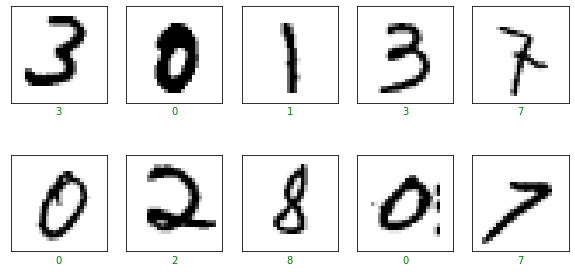

In [3]:
(x_train, y_train), (x_test, y_test) = nn_utils.load_data()
nn_utils.plot_random_examples(x_train, y_train)

In [4]:
net = NeuralNetwork([784, 128, 128, 10])
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [5]:
batch_size = 280
epochs = 100
lr = 0.01

In [6]:
history = net.train(
    x_train, y_train,
    x_test, y_test, epochs,
    batch_size, lr
)

Epoch 0............Val acc: 0.1206
Epoch 1............Val acc: 0.1289
Epoch 2............Val acc: 0.1401
Epoch 3............Val acc: 0.1479
Epoch 4............Val acc: 0.1592
Epoch 5............Val acc: 0.1753
Epoch 6............Val acc: 0.1902
Epoch 7............Val acc: 0.2035
Epoch 8............Val acc: 0.2147
Epoch 9............Val acc: 0.2289
Epoch 10............Val acc: 0.2465
Epoch 11............Val acc: 0.2615
Epoch 12............Val acc: 0.273
Epoch 13............Val acc: 0.2867
Epoch 14............Val acc: 0.2978
Epoch 15............Val acc: 0.3086
Epoch 16............Val acc: 0.3135
Epoch 17............Val acc: 0.3192
Epoch 18............Val acc: 0.3291
Epoch 19............Val acc: 0.3386
Epoch 20............Val acc: 0.343
Epoch 21............Val acc: 0.3518
Epoch 22............Val acc: 0.3546
Epoch 23............Val acc: 0.3626
Epoch 24............Val acc: 0.3683
Epoch 25............Val acc: 0.3724
Epoch 26............Val acc: 0.3767
Epoch 27............Val acc: 0.3774
Epoc

# Task 9: Results

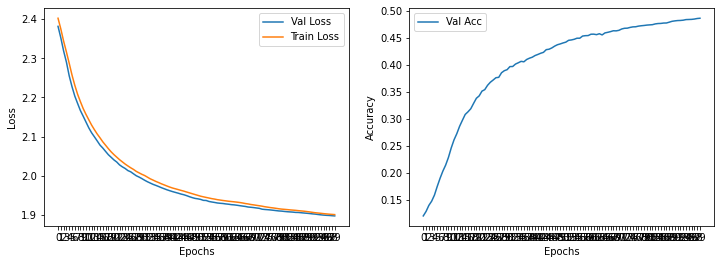

In [7]:
nn_utils.plot_results(history).show()

In [8]:
pred = net.predict(x_test)

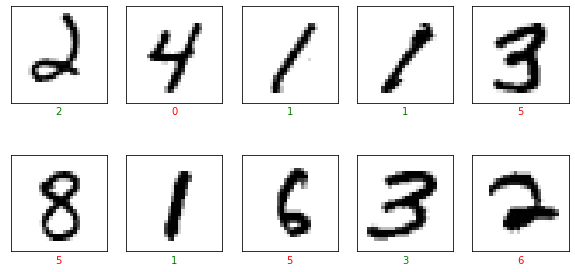

In [9]:
nn_utils.plot_random_examples(x_test, y_test, pred.numpy()).show()